In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(fish.shape)
fish['Species'].value_counts()

(159, 6)


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

fish_target = fish["Species"].to_numpy()
fish_target[:5]

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state=42)

In [7]:
print(np.shape(train_input))
print(np.shape(test_input))

(119, 5)
(40, 5)


In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

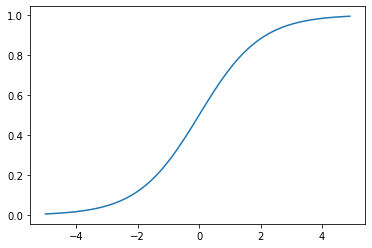

In [9]:
z = np.arange(-5, 5, 0.1)
prob_y = 1/(1+np.exp(-z))

plt.plot(z, prob_y)

In [10]:
bream_smelt_index = (train_target == 'Bream') | (train_target == 'Smelt')

In [11]:
train_bream_smelt = train_scaled[bream_smelt_index]
target_bream_smelt = train_target[bream_smelt_index]

print(np.shape(train_scaled))
print(np.shape(train_bream_smelt))

(119, 5)
(33, 5)


In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [13]:
lr.predict(train_bream_smelt[:5])
print(train_bream_smelt[:5])
print(lr.predict_proba(train_bream_smelt[:10]))
print(lr.predict(train_bream_smelt[:10]))

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
[[9.97598548e-01 2.40145188e-03]
 [2.73518278e-02 9.72648172e-01]
 [9.94860716e-01 5.13928355e-03]
 [9.85842021e-01 1.41579793e-02]
 [9.97672689e-01 2.32731108e-03]
 [3.19313332e-02 9.68068667e-01]
 [9.73126218e-01 2.68737821e-02]
 [9.99532898e-01 4.67102003e-04]
 [9.86833271e-01 1.31667287e-02]
 [9.02298747e-01 9.77012526e-02]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream']


In [14]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [15]:
# C = 1/lambda
lr = LogisticRegression(C = 20,max_iter = 1000) #근사식 (해를 찾기 어렵기 때문에 근접수치로)

print(lr.fit(train_scaled, train_target))

LogisticRegression(C=20, max_iter=1000)


In [16]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [17]:
print(lr.predict(test_scaled[:10]))
print(test_target[:10])

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike']


In [18]:
lr.predict_proba(test_scaled[:5]).round(3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [19]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [20]:
print(lr.coef_)
print()
print(lr.intercept_)

[[-1.49001999 -1.02912482  2.59345218  7.70357843 -1.2007022 ]
 [ 0.19618201 -2.01068627 -3.77976461  6.50491598 -1.99482485]
 [ 3.56279819  6.34356926 -8.48970993 -5.757574    3.79307177]
 [-0.10458121  3.603196    3.93067836 -3.61737079 -1.75069674]
 [-1.40061524 -6.07503319  5.25969396 -0.87219889  1.86043687]
 [-1.38526189  1.49214385  1.39226012 -5.67734222 -4.40097623]
 [ 0.62149812 -2.32406483 -0.9066101   1.71599149  3.69369137]]

[-0.09205181 -0.26290863  3.25101315 -0.14742819  2.65498377 -6.78783248
  1.38422419]


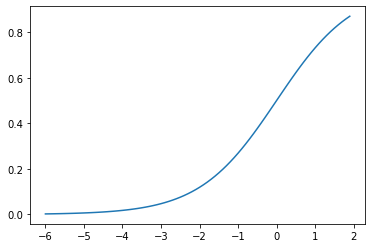

In [22]:
z = np.arange(-6, 2, 0.1)
y = 1/(1+np.exp(-z))

plt.plot(z,y)